In [57]:
library('keras')
#mnist <- dataset_mnist()
#
#x_train <- mnist$train$x[1:800,1:28 ,1:28 ]
#print(class(x_train))
#y_train <- mnist$train$y[1:800 ]
#x_test  <- mnist$test$x[801:1000,1:28 ,1:28]
#y_test  <- mnist$test$y[801:1000]
#x_train <- array_reshape(x_train, c(nrow(x_train), 784))
#x_test <- array_reshape(x_test, c(nrow(x_test), 784))
## rescale
#x_train <- x_train / 255
#x_test <- x_test / 255
#
#y_train <- to_categorical(y_train, 10)
#y_test <- to_categorical(y_test, 10)
#
#print(class(x_train))

[1] "array"
[1] "matrix"


In [1]:
library('keras')

cv_tune_builder <- function (builder, params, x, y, cv=4){
    l=as.integer(nrow(x)/cv)
    accs <- NULL
    for(i in 0:(cv-1)){
        x_tr <- x[-(i*l+1):-(l*(i+1)),]; x_cv <- x[(i*l+1):(l*(i+1)),]; 
        y_tr <- y[-(i*l+1):-(l*(i+1)),]; y_cv <- y[(i*l+1):(l*(i+1)),];
        model <- builder(params)
        eph    = ifelse('epochs'     %in% names(params), params$epochs     , 30  )
        b_size = ifelse('batch_size' %in% names(params), params$batch_size , 128 )
        hist  <- model %>% fit (x_tr, y_tr,  epochs = eph, batch_size = b_size)
        stats <- model %>% evaluate(x_cv, y_cv)
        accs <- c(accs, stats[[2]])
    }
    return (accs)
}


tune_builder <- function(builder, par_default, par_list, x, y, cv=4, verbose=FALSE){
    grid = expand.grid(par_list)
    mean_accs <- NULL
    best_acc <- 0.0
    par_best <- rlang::duplicate(par_default, shallow=FALSE)
    for(i in 1:nrow(grid)){
        par_copy <- rlang::duplicate(par_default, shallow=FALSE)
        for (name in names(par_list)){
            par_copy[[name]] <- grid[[name]][i]
        }
        acc <- cv_tune_builder(builder, par_copy, x, y, cv)
        mean_accs <- c(mean_accs, mean(acc))
        if(verbose){
            print("Parameters: ")
            print(par_copy)
            print("Accuracies:")
            print(acc)
            print(paste("Mean: ", mean(acc)))
        }
        if (mean(acc)>best_acc){
            best_acc <- mean(acc)
            par_best <- rlang::duplicate(par_copy, shallow=FALSE)
        }        
    }
    if(verbose){
        print("Best Parameters: ")
        print(par_best)
        print(paste("Accuracy:", best_acc))
    }
    grid$Mean_acc <- mean_accs
    #return(par_best)
    return (grid)
}

In [2]:
#build_model <- function(params){
#    model <- keras_model_sequential()
#    model %>%
#      layer_dense(units = params$unit1, activation = 'relu', input_shape = c(784)) %>%
#      layer_dropout(rate = params$dropout1) %>%
#      layer_dense(units = params$unit2, activation = 'relu') %>%
#      layer_dropout(rate = params$dropout2) %>%
#      layer_dense(units = params$unit3, activation = 'softmax')
#
#    model %>% compile(
#      loss = 'categorical_crossentropy',
#      optimizer = optimizer_rmsprop(),
#      metrics = c('accuracy')
#    )
#    return(model)
#}
#myParams <- flags(
#    flag_numeric("dropout1", 0.4),
#    flag_numeric("dropout2", 0.3),
#    flag_numeric("unit1", 256),
#    flag_numeric("unit2", 128),
#    flag_numeric("unit3", 10)
#)

In [3]:
#myList <- list(dropout1= c(0.3, 0.2), 
#               unit2=c (128, 64), 
#              epochs= c(3,5))
##myList <- list(dropout1= c(0.3), 
##               unit2=c (128) )
#
#tuned_grid <- tune_builder(build_model, myParams, myList, x_train, y_train, 4, FALSE )
#
#print(tuned_grid)

In [2]:
library(repr)

data.bkg  <- read.csv("data/P_LHCB_LambdaB/background.csv")
data.sig  <- read.csv("data/P_LHCB_LambdaB/MC_signal.csv")
data.lhcb <- read.csv("data/P_LHCB_LambdaB/data_lhcb.csv")



In [3]:
data.bkg.Cutted   <- data.bkg  %>% dplyr::filter( (Lambda_b0_MM_F > 5550 &  Lambda_b0_MM_F < 5680 ) |  DeltaM_F < 360)
data.sig.Cutted   <- data.sig  %>% dplyr::filter( (Lambda_b0_MM_F > 5550 &  Lambda_b0_MM_F < 5680 ) |  DeltaM_F < 360)
data.lhcb.Cutted  <- data.lhcb %>% dplyr::filter( (Lambda_b0_MM_F > 5550 &  Lambda_b0_MM_F < 5680 ) |  DeltaM_F < 360)


In [81]:
tr_frac <- 0.8

#sel_features <- c(-1, -4, -15, -20:-28)

sel_features <- c(3, 6, 7, 8, 9, 10, 11, 12, 14, 17, 18)

#x_train_bkg <- as.matrix(data.bkg.Cutted[ 1: as.integer(nrow(data.bkg)*tr_frac) ,sel_features ])
#x_train_sig <- as.matrix(data.sig.Cutted[ 1: as.integer(nrow(data.sig)*tr_frac) ,sel_features ])
#x_test_bkg  <- as.matrix(data.bkg.Cutted[-1:-as.integer(nrow(data.bkg)*tr_frac) ,sel_features ])
#x_test_sig  <- as.matrix(data.sig.Cutted[-1:-as.integer(nrow(data.sig)*tr_frac) ,sel_features ])
 
x_train_bkg <- as.matrix(data.bkg[ 1: 2000  ,sel_features])
x_train_sig <- as.matrix(data.sig[          ,sel_features])
x_test_bkg  <- as.matrix(data.bkg[-1:-as.integer(nrow(data.bkg)*tr_frac) ,sel_features ])
x_test_sig  <- as.matrix(data.sig[-1:-as.integer(nrow(data.sig)*tr_frac) ,sel_features ])

y_train_bkg <- as.vector(matrix(0, nrow=nrow(x_train_bkg), ncol=1))
y_train_sig <- as.vector(matrix(1, nrow=nrow(x_train_sig), ncol=1))
y_test_bkg  <- as.vector(matrix(0, nrow=nrow(x_test_bkg), ncol=1))
y_test_sig  <- as.vector(matrix(1, nrow=nrow(x_test_sig), ncol=1))

x_train_bkg <- scale(x_train_bkg)
x_train_sig <- scale(x_train_sig)
x_test_bkg  <- scale(x_test_bkg )
x_test_sig  <- scale(x_test_sig )

x_train <- rbind(x_train_bkg , x_train_sig )
x_test  <- rbind(x_test_bkg  , x_test_sig  )
y_train <-     c(y_train_bkg , y_train_sig )    
y_test  <-     c(y_test_bkg  , y_test_sig  )   

#for (i in 1:4){
#    x_train <- rbind(x_train, x_train_sig )
#    x_test  <- rbind(x_test , x_test_sig  )
#    y_train <-     c(y_train, y_train_sig ) 
#    y_test  <-     c(y_test , y_test_sig  ) 
#}



shuffle_train <- sample(nrow(x_train))
shuffle_test  <- sample(nrow(x_test ))

x_train <- x_train[shuffle_train,]
y_train <- y_train[shuffle_train] 
x_test  <- x_test [shuffle_test,]
y_test  <- y_test [shuffle_test] 

#x_train <- array_reshape(x_train, c(nrow(x_train), ncol(x_train)))
#x_test  <- array_reshape(x_test , c(nrow(x_test ), ncol(x_test )))


x_lhcb <- as.matrix(data.lhcb[,sel_features])
x_lhcb_cutted <-as.matrix(data.lhcb.Cutted[,sel_features])
x_lhcb <- scale(x_lhcb)
x_lhcb_cutted <-scale(x_lhcb)




In [82]:

build_model <- function(params){
    model <- keras_model_sequential()
    model %>%
      layer_dense(units = params$unit1, activation = 'relu', 
                  input_shape = c(params$nFeat), 
                  kernel_regularizer=regularizer_l1_l2(l1=params$l1_coeff, l2=params$l2_coeff)) %>%
      layer_dropout(rate = params$dropout1) %>%
      layer_dense(units = params$unit2, activation = 'relu',  
                  kernel_regularizer=regularizer_l1_l2(l1=params$l1_coeff, l2=params$l2_coeff)) %>%
      layer_dropout(rate = params$dropout2) %>%
      layer_dense(units = params$unit3, activation = 'relu', 
                  kernel_regularizer=regularizer_l1_l2(l1=params$l1_coeff, l2=params$l2_coeff)) %>%
      layer_dropout(rate = params$dropout3) %>%
      #layer_dense(units = params$unit4, activation = 'relu', 
      #            kernel_regularizer=regularizer_l1_l2(l1=params$l1_coeff, l2=params$l2_coeff)) %>%
      #layer_dropout(rate = params$dropout4) %>%
      #layer_dense(units = params$unit5, activation = 'relu', 
      #            kernel_regularizer=regularizer_l1_l2(l1=params$l1_coeff, l2=params$l2_coeff)) %>%
      #layer_dropout(rate = params$dropout5) %>%
      layer_dense(units = 1, activation = 'sigmoid')

    model %>% compile(
      loss = 'binary_crossentropy',
      optimizer = optimizer_rmsprop(),
      metrics = c('accuracy')
    )
    return(model)
}




In [83]:
summary(model)

Model: "sequential_17"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_51 (Dense)                    (None, 128)                     1536        
________________________________________________________________________________
dropout_36 (Dropout)                (None, 128)                     0           
________________________________________________________________________________
dense_52 (Dense)                    (None, 64)                      8256        
________________________________________________________________________________
dropout_37 (Dropout)                (None, 64)                      0           
________________________________________________________________________________
dense_53 (Dense)                    (None, 32)                      2080        
________________________________________________________________________________
dropo

loss  accuracy 
0,6105197 0,7855307

`geom_smooth()` using formula 'y ~ x'


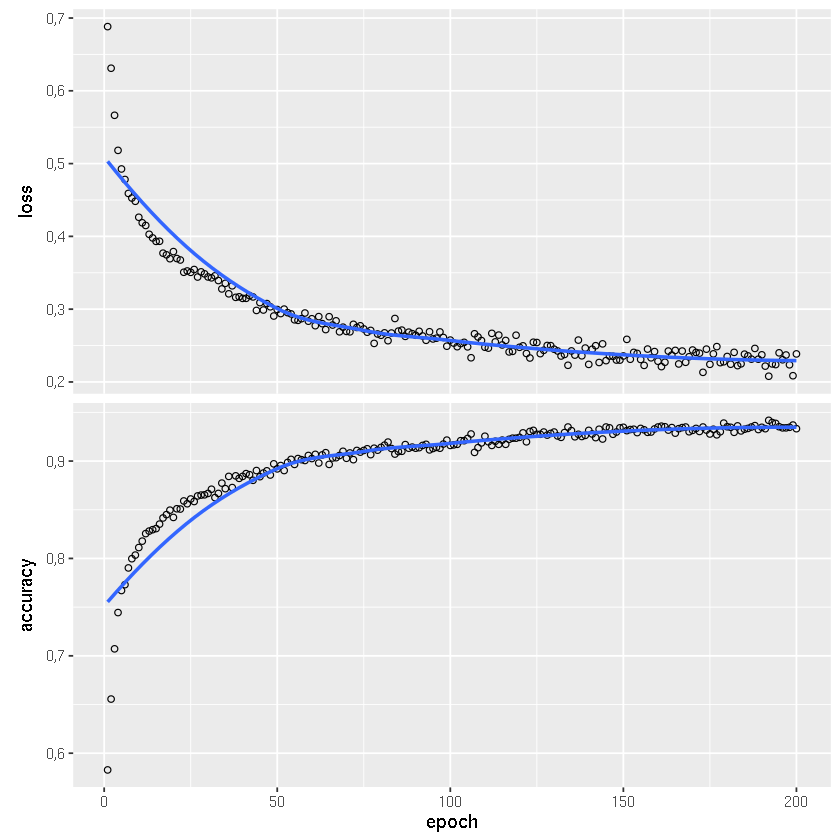

In [84]:
myParams <- flags(
    flag_numeric("dropout1", 0.1),
    flag_numeric("dropout2", 0.1),
    flag_numeric("dropout3", 0.1),
    flag_numeric("dropout4", 0.1),
    flag_numeric("dropout5", 0.1),
    flag_numeric("unit1", 128),
    flag_numeric("unit2", 64),
    flag_numeric("unit3", 32),
    flag_numeric("unit4", 16),
    flag_numeric("unit5", 8),
    flag_numeric("nFeat", ncol(x_train)),
    flag_numeric("l1_coeff", 0),
    flag_numeric("l2_coeff", 1e-4)
)



model    <- build_model(myParams)
history  <- model %>% fit (x_train, y_train,  epochs = 200, batch_size = 10, validation_split = 0.0)
model %>% evaluate(x_test, y_test)
plot(history)



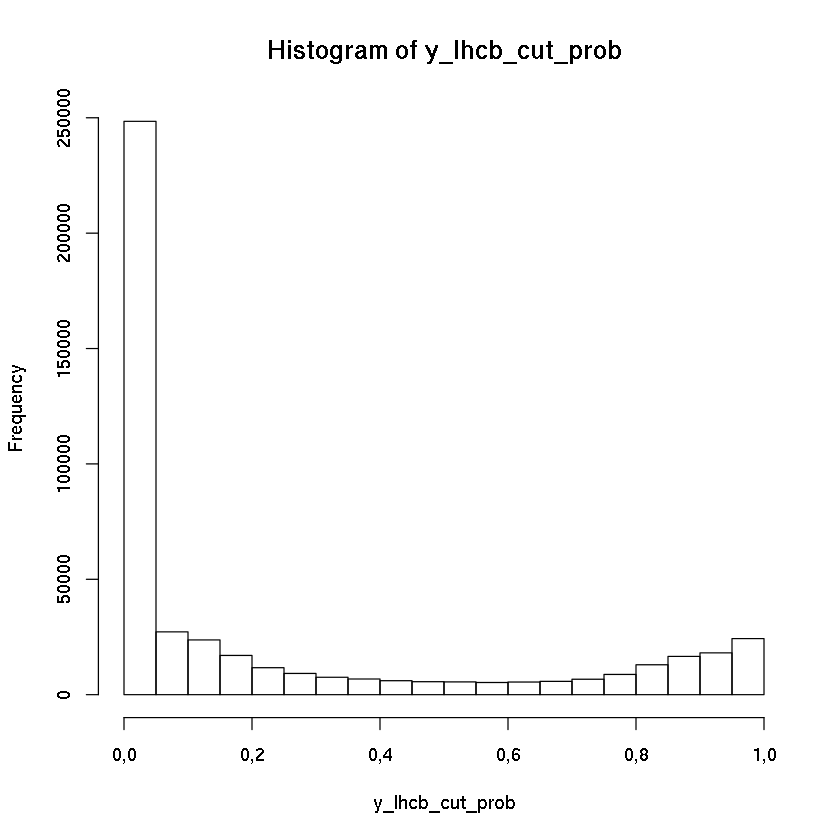

In [85]:
y_lhcb_cut      <- model %>% predict_classes(x_lhcb_cutted) 
y_lhcb_cut_prob <- model %>% predict(x_lhcb_cutted) 
hist(y_lhcb_cut_prob)

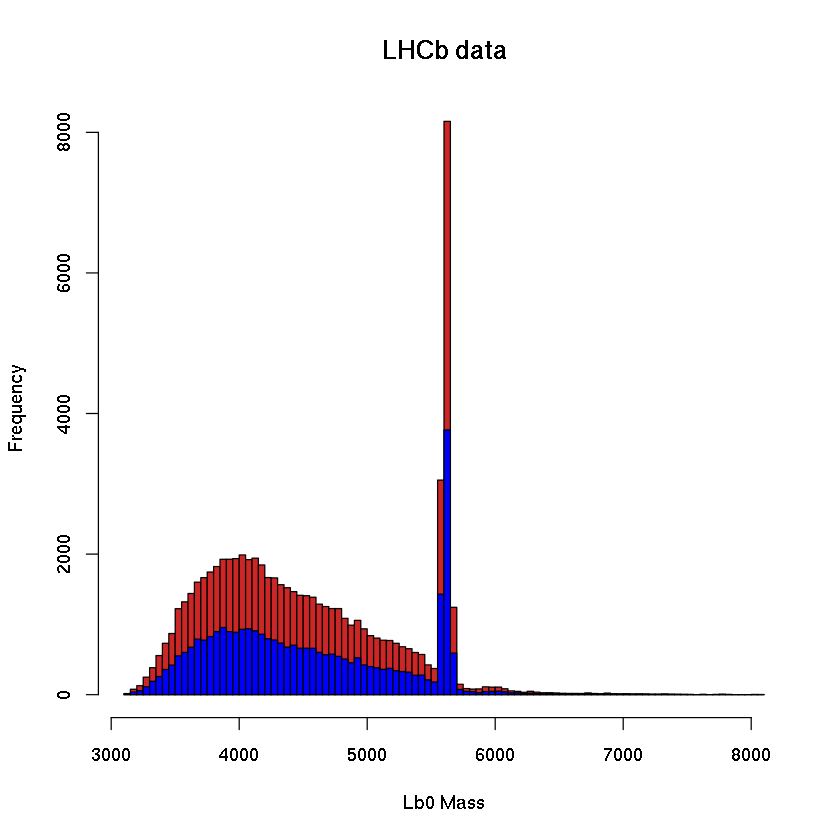

In [88]:
#hist(data.lhcb.Cutted$Lambda_b0_MM_F[y_lhcb_cut==0],  breaks=100, col="firebrick3", xlab="Lb0 Mass", main="LHCb data",  probability=FALSE)
#hist(data.lhcb.Cutted$Lambda_b0_MM_F[y_lhcb_cut==1],  breaks=100, col="blue", xlab="Lb0 Mass", main="LHCb data",  probability=FALSE, add=TRUE)

p <- 0.05
hist(data.lhcb.Cutted$Lambda_b0_MM_F[y_lhcb_cut_prob>0],  breaks=100, col="firebrick3", xlab="Lb0 Mass", main="LHCb data",  probability=FALSE)
hist(data.lhcb.Cutted$Lambda_b0_MM_F[y_lhcb_cut_prob>p],  breaks=100, col="blue", xlab="Lb0 Mass", main="LHCb data",  probability=FALSE, add=TRUE)

In [303]:




#myList <- list(dropout1= c(0.3, 0.2), 
#               unit2=c (128, 64), 
#              epochs= c(3,5))
##myList <- list(dropout1= c(0.3), 
##               unit2=c (128) )
#
#tuned_grid <- tune_builder(build_model, myParams, myList, x_train, y_train, 4, FALSE )
#
#print(tuned_grid)

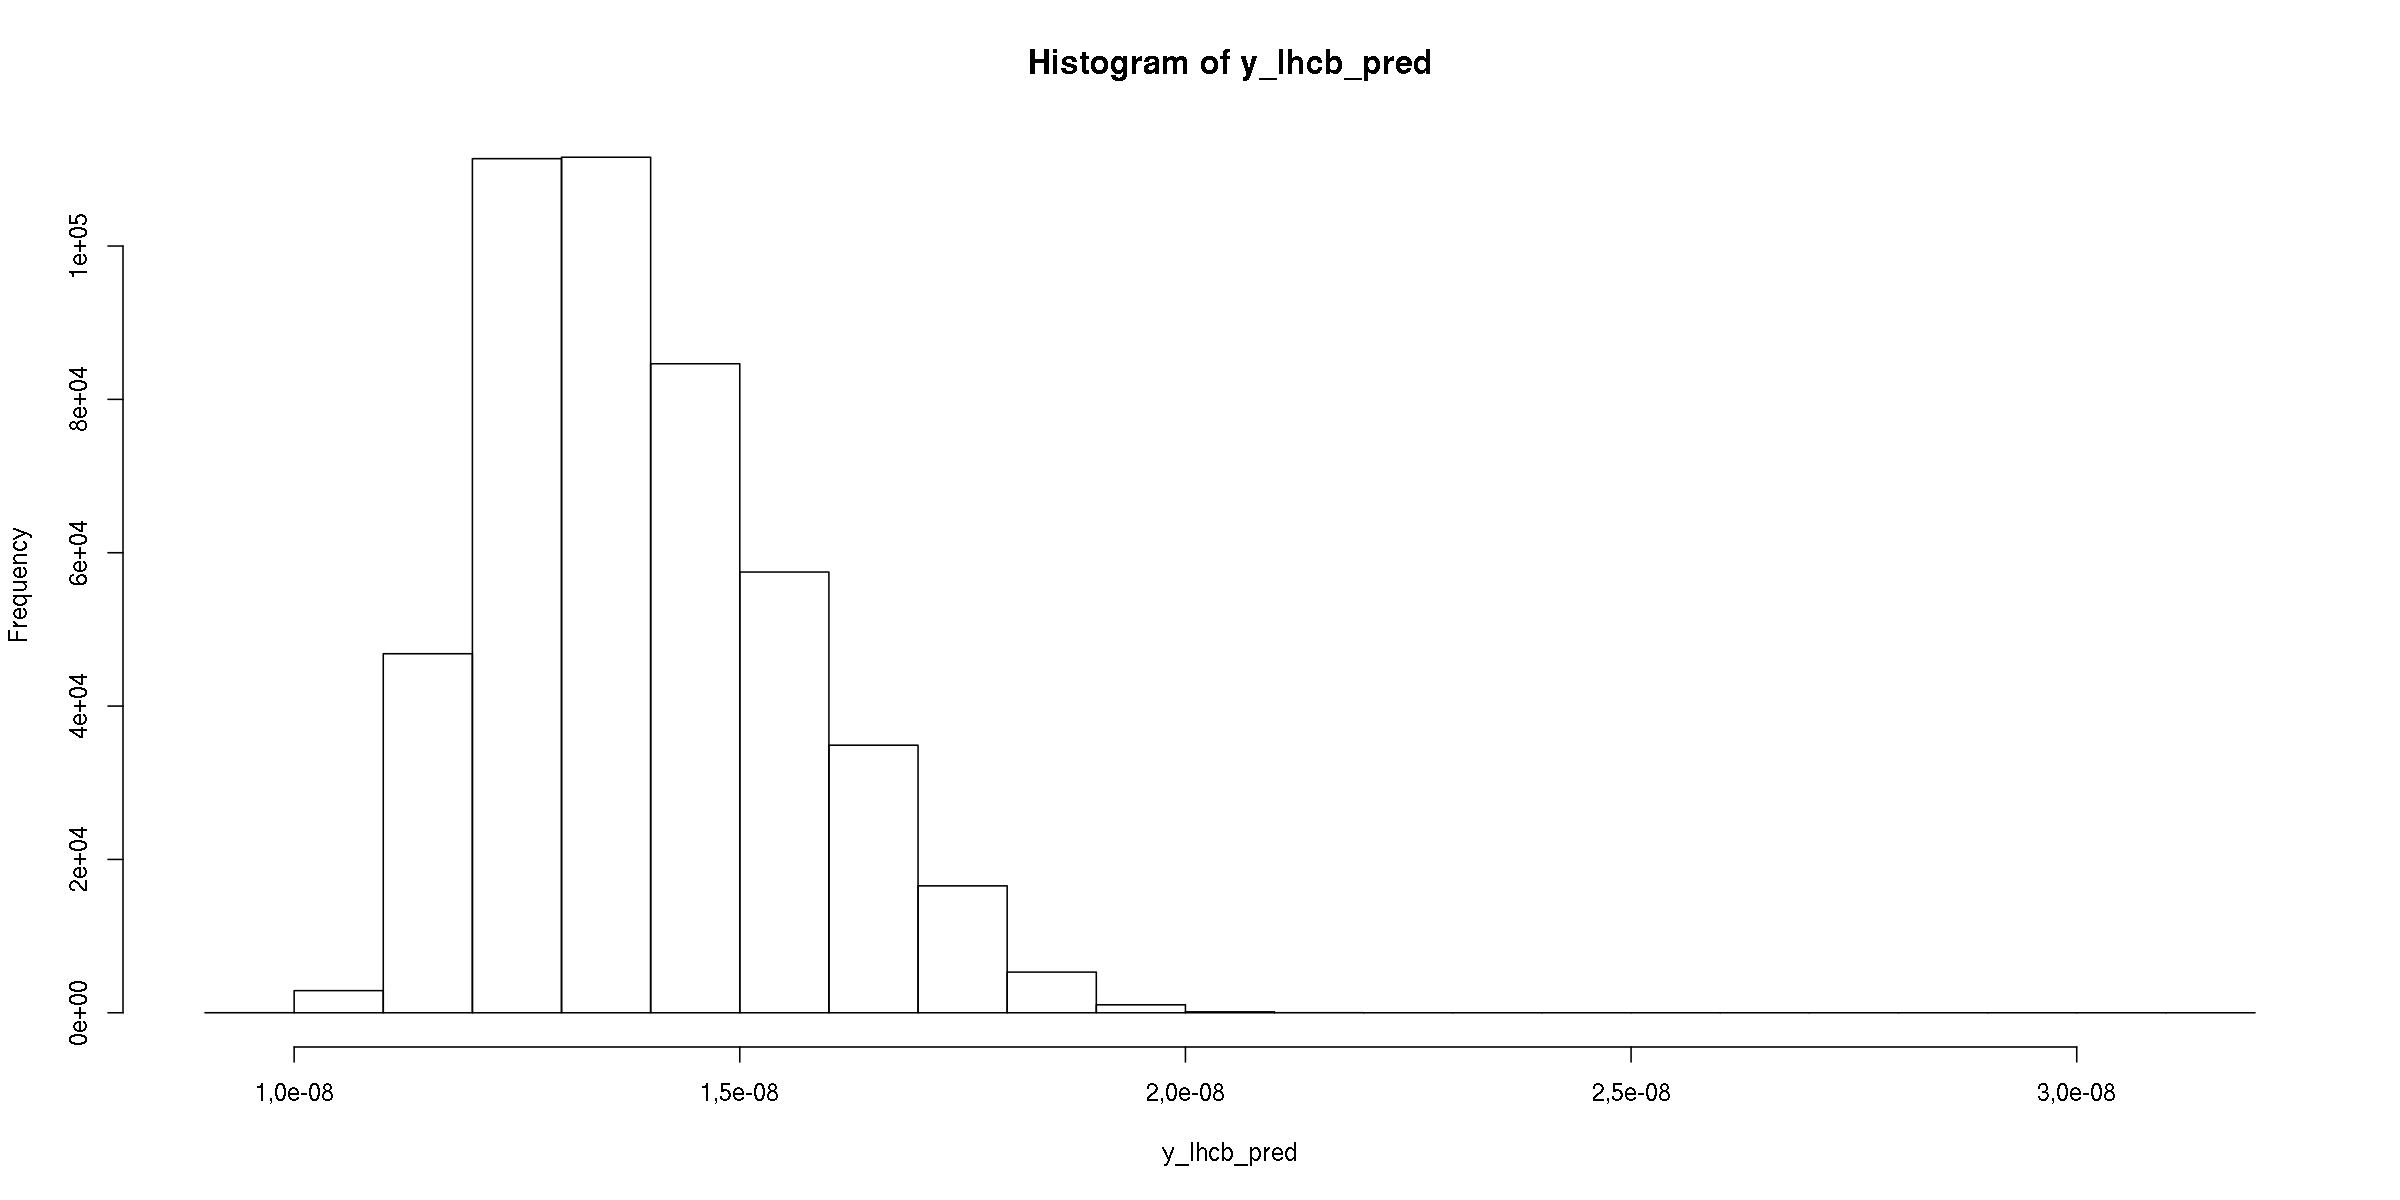

In [75]:
y_lhcb_pred <- model %>% predict(x_lhcb) 
hist(y_lhcb_pred)


Warning message in min(x):
“no non-missing arguments to min; returning Inf”Warning message in max(x):
“no non-missing arguments to max; returning -Inf”

ERROR: Error in hist.default(data.lhcb.Cutted$Lambda_b0_MM_F[y_lhcb_pred > p], : character(0)


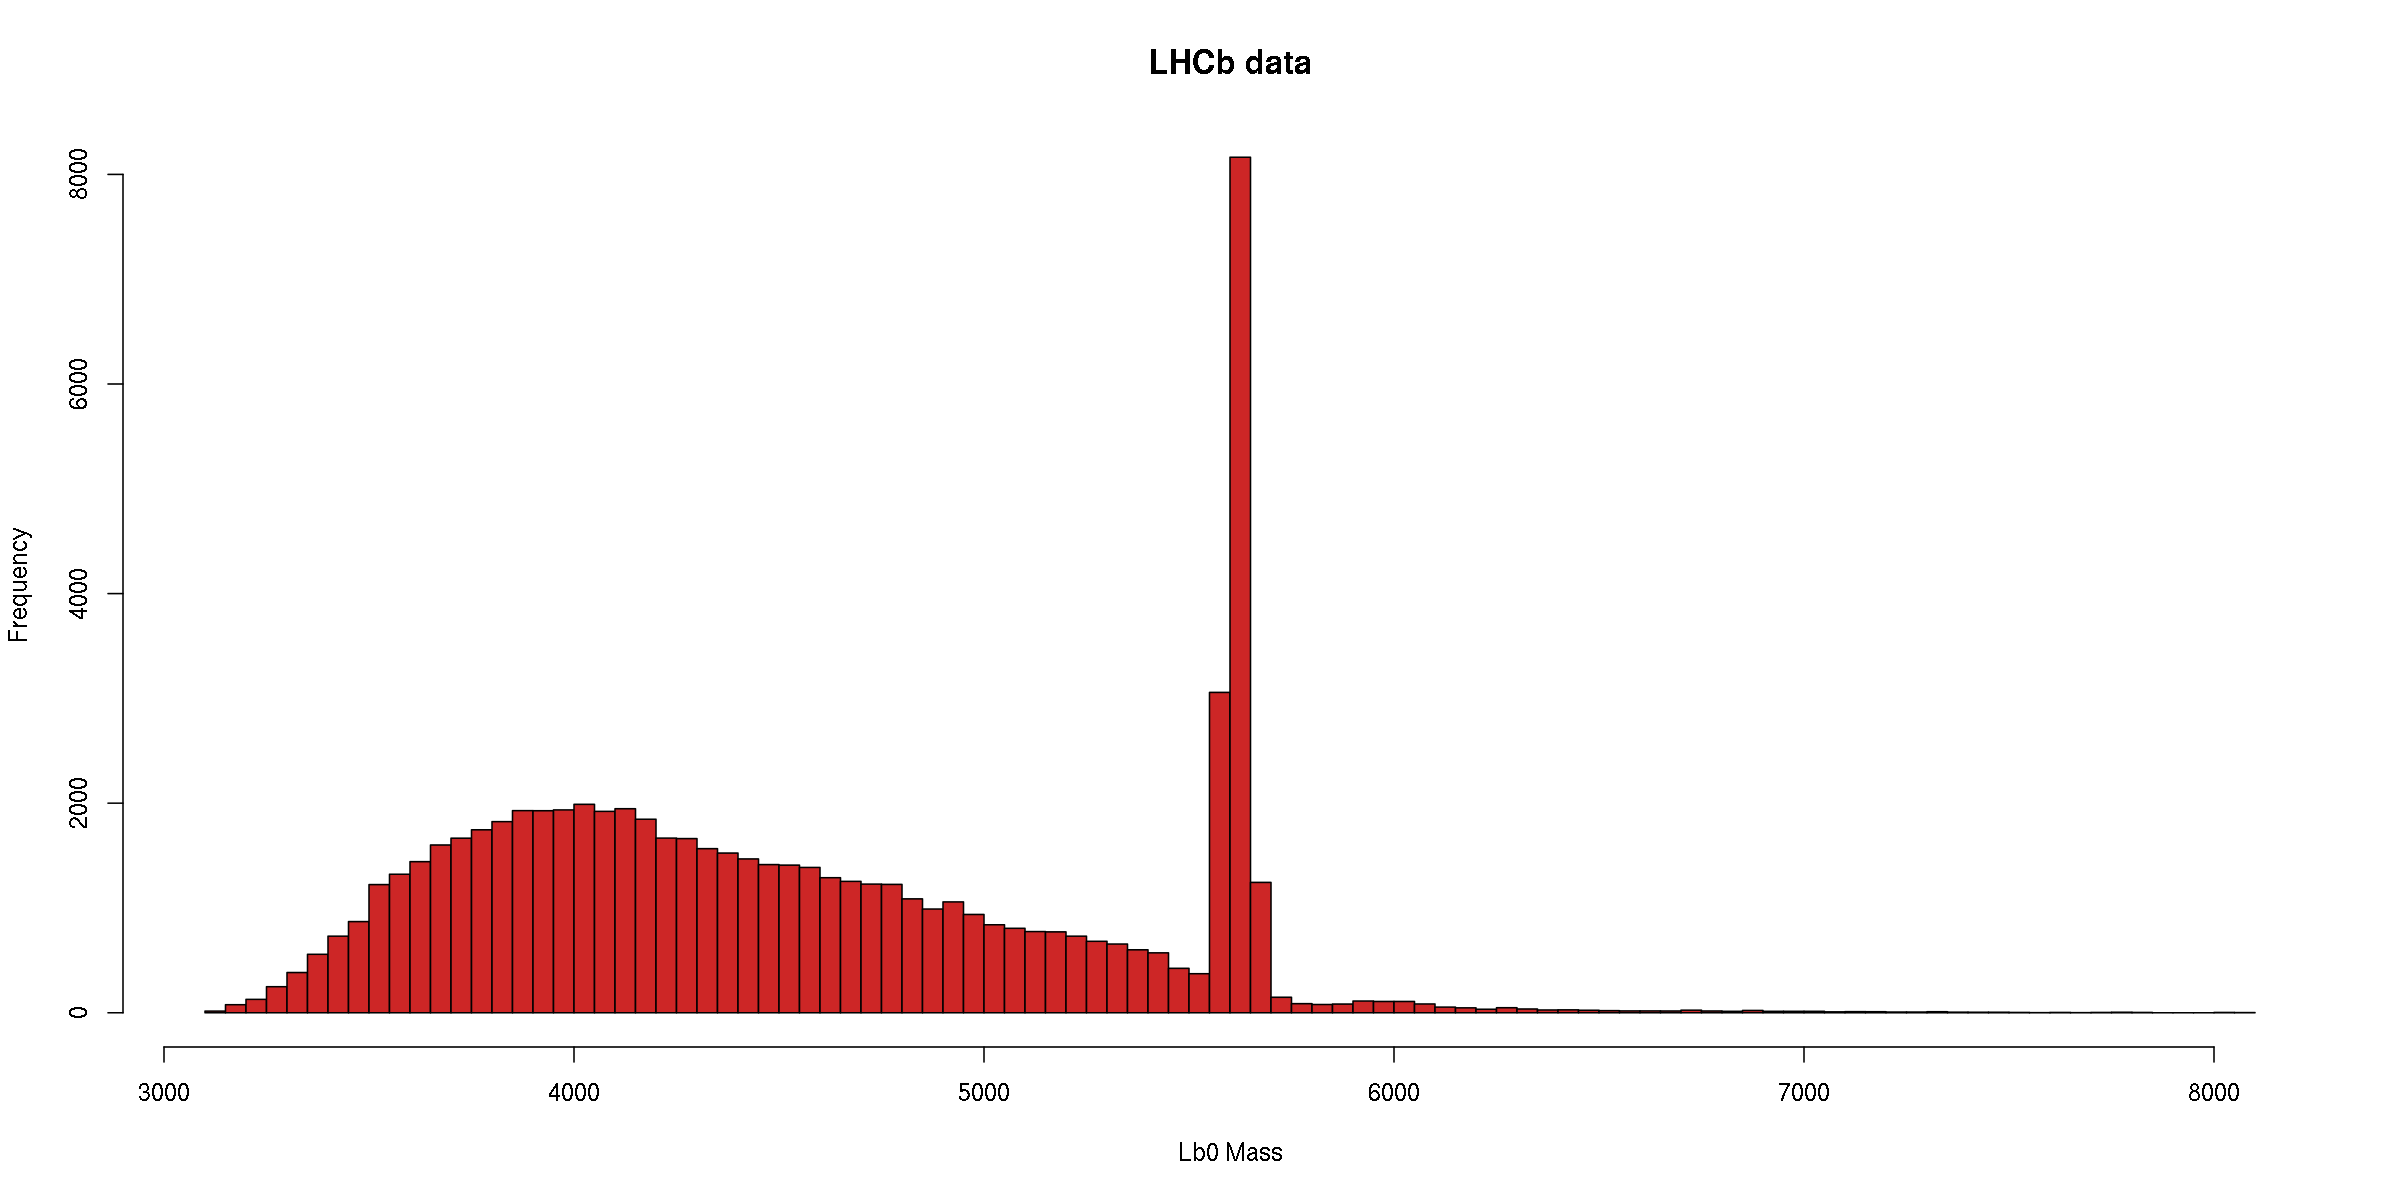

In [74]:
p <- 0.4
hist(data.lhcb.Cutted$Lambda_b0_MM_F[y_lhcb_pred<p], breaks=100, col="firebrick3", xlab="Lb0 Mass", main="LHCb data",  probability=FALSE)
hist(data.lhcb.Cutted$Lambda_b0_MM_F[y_lhcb_pred>p], breaks=100, col="firebrick3", xlab="Lb0 Mass", main="LHCb data",  probability=FALSE)
hist(data.lhcb.Cutted$Lambda_b0_MM_F[y_lhcb_pred>0.95], breaks=100, add=TRUE, col='blue')



In [89]:

build_model_CNN <- function(params){
    model <- keras_model_sequential()
    model %>%
      layer_conv_1d(filters = 30, kernel_size = 4, activation = "relu", 
                input_shape =c( params$nFeat,1) ) %>%
      layer_max_pooling_1d(pool_size = 2) %>% 
      layer_conv_1d(filters = 30, kernel_size = 2, activation = "relu") %>%
      #layer_max_pooling_1d(pool_size = 2) %>% 
      layer_flatten() %>% 
      layer_dense(units = params$unit1, activation = 'relu') %>%
      layer_dropout(rate = params$dropout1) %>%
        layer_dense(units = params$unit2, activation = 'relu') %>%
      layer_dropout(rate = params$dropout2) %>%
      layer_dense(units = 1, activation = 'sigmoid')

    model %>% compile(
      loss = 'binary_crossentropy',
      optimizer = optimizer_rmsprop(),
      metrics = c('accuracy')
    )
    return(model)
}

`geom_smooth()` using formula 'y ~ x'


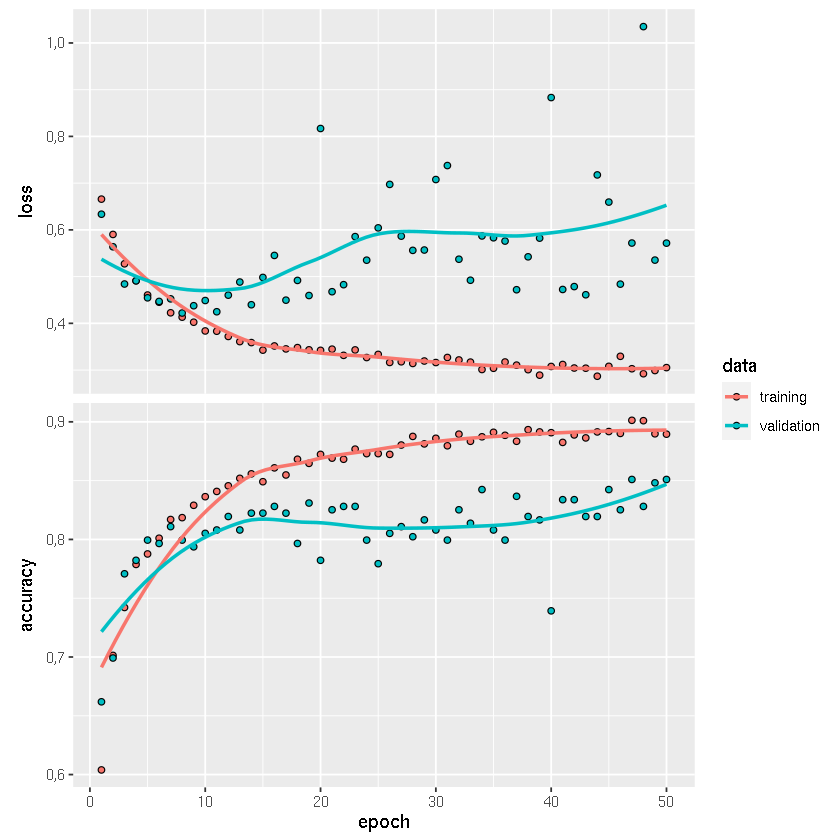

In [90]:
myParams <- flags(
    flag_numeric("dropout1", 0.0),
    flag_numeric("dropout2", 0.2),
    flag_numeric("dropout3", 0.2),
    flag_numeric("dropout4", 0.1),
    flag_numeric("dropout5", 0.1),
    flag_numeric("unit1",     64*2),
    flag_numeric("unit2",     32),
    flag_numeric("unit3",     16*2),
    flag_numeric("unit4",     16),
    flag_numeric("unit5",      8),
    flag_numeric("nFeat", ncol(x_train)),
    flag_numeric("l1_coeff", 1e-3),
    flag_numeric("l2_coeff", 1e-4)
)

x_train_cnn <- array_reshape(x_train, c(nrow(x_train),ncol(x_train),1) )

model    <- build_model_CNN(myParams)
history  <- model %>% fit (x_train_cnn, y_train,  epochs = 50, batch_size = 5, validation_split = 0.1)
plot(history)



In [91]:
x_lh_cut_cnn <- array_reshape(x_lhcb_cutted,
                              c(nrow(x_lhcb_cutted),ncol(x_lhcb_cutted),1) )

y_lhcb_cut      <- model %>% predict_classes(x_lh_cut_cnn) 
y_lhcb_cut_prob <- model %>% predict(x_lh_cut_cnn) 

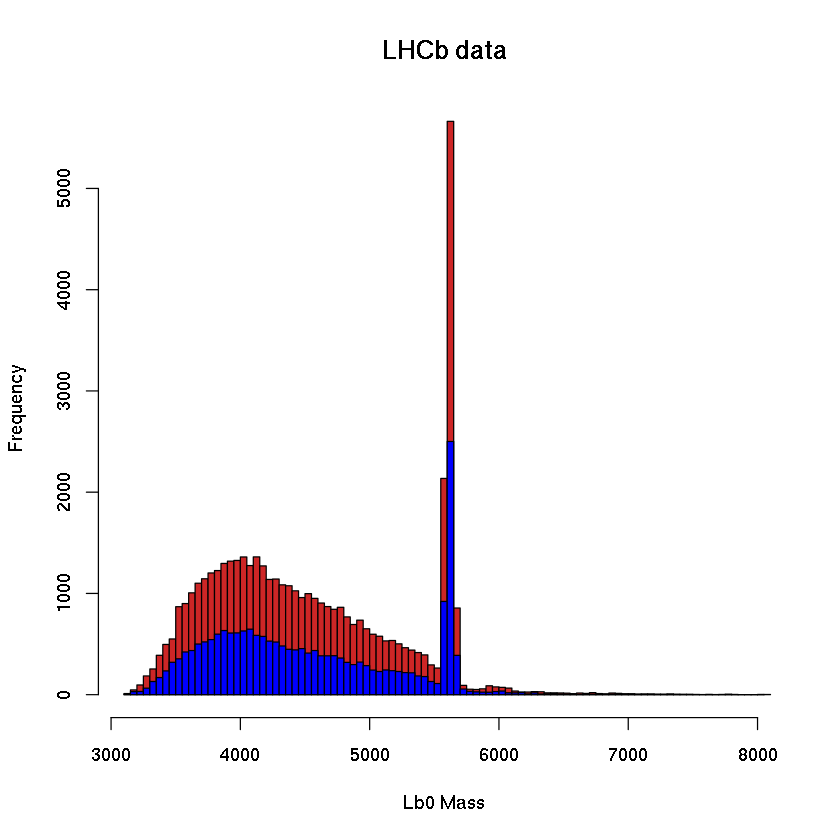

In [92]:
hist(data.lhcb.Cutted$Lambda_b0_MM_F[y_lhcb_cut==0],  breaks=100, col="firebrick3", xlab="Lb0 Mass", main="LHCb data",  probability=FALSE)
hist(data.lhcb.Cutted$Lambda_b0_MM_F[y_lhcb_cut==1],  breaks=100, col="blue", xlab="Lb0 Mass", main="LHCb data",  probability=FALSE, add=TRUE)

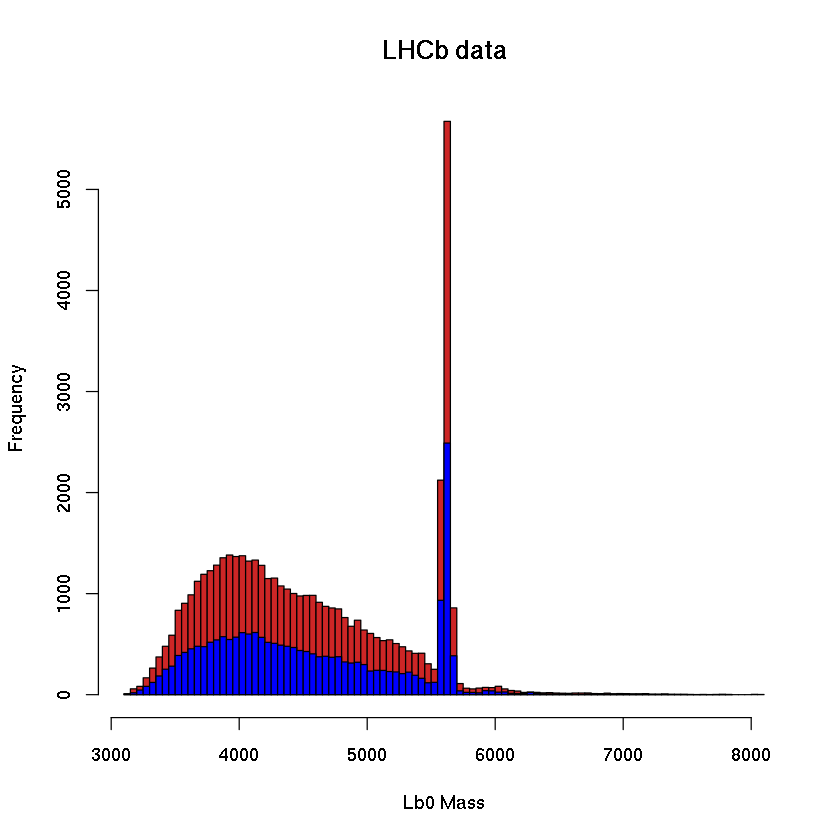

In [51]:
#hist(y_lhcb_cut_prob)

p <- 0.01
hist(data.lhcb.Cutted$Lambda_b0_MM_F[y_lhcb_cut_prob<p],  breaks=100, col="firebrick3", xlab="Lb0 Mass", main="LHCb data",  probability=FALSE)
hist(data.lhcb.Cutted$Lambda_b0_MM_F[y_lhcb_cut_prob>p],  breaks=100, col="blue", xlab="Lb0 Mass", main="LHCb data",  probability=FALSE, add=TRUE)